In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
load_data = pd.read_csv('used_cars_data.csv')
load_data.shape

(7253, 14)

In [3]:
load_data.info() # Get info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [4]:
## Apply random sampling
# -------------------------
df = load_data.sample(n=35)
df.shape

(35, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 7112 to 2782
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              35 non-null     int64  
 1   Name               35 non-null     object 
 2   Location           35 non-null     object 
 3   Year               35 non-null     int64  
 4   Kilometers_Driven  35 non-null     int64  
 5   Fuel_Type          35 non-null     object 
 6   Transmission       35 non-null     object 
 7   Owner_Type         35 non-null     object 
 8   Mileage            35 non-null     object 
 9   Engine             35 non-null     object 
 10  Power              35 non-null     object 
 11  Seats              35 non-null     float64
 12  New_Price          6 non-null      object 
 13  Price              24 non-null     float64
dtypes: float64(2), int64(3), object(9)
memory usage: 4.1+ KB


In [6]:
df.head(3) # 1st 3 lines

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7112,7112,Skoda Superb Elegance 2.0 TDI CR AT,Pune,2013,90000,Diesel,Automatic,First,17.2 kmpl,1968 CC,138.1 bhp,5.0,NaN,NaN
5670,5670,Toyota Etios VD SP,Kolkata,2014,45155,Diesel,Manual,First,23.59 kmpl,1364 CC,67.04 bhp,5.0,NaN,6.5
7029,7029,Hyundai i20 2015-2017 1.4 CRDi Sportz,Pune,2011,104500,Diesel,Manual,Second,23.0 kmpl,1396 CC,90 bhp,5.0,NaN,NaN


In [7]:
# To get list of columns
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [8]:
# Drop unwanted Columns
df.drop(columns=['S.No.','Seats','Owner_Type','Power'],inplace=True)

In [9]:
df.shape

(35, 10)

In [10]:
# Check any duplicate items are exists ->drop duplicate item
df.duplicated().sum()

np.int64(0)

In [11]:
# Check any duplicate items are exists ->drop duplicate item
df.duplicated().sum()

np.int64(0)

In [12]:
df['New_Price']
df['Price']

7112      NaN
5670     6.50
7029      NaN
3328    10.75
6922      NaN
3223     2.25
600     11.69
3070     3.00
6820      NaN
2986    10.69
31       6.75
497      1.60
3322     6.25
6243      NaN
5412    13.85
6075      NaN
5896     6.37
3330     5.95
2349     2.00
6733      NaN
6519      NaN
7189      NaN
4431     3.84
5357     7.21
3826     2.23
3463     6.16
5756    19.75
114      3.35
771     15.65
6289      NaN
3548     9.75
4734     2.90
3630    14.35
7156      NaN
2782     5.85
Name: Price, dtype: float64

In [13]:
# (df.isnull().sum()/len(df))*100
df.fillna(value=df.isnull().sum()/len(df)*100,inplace=True)

In [14]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Mileage              0
Engine               0
New_Price            0
Price                0
dtype: int64

In [15]:
# rename - some fields
# df.rename(columns={'oldKey':'replaceNewkey'})
df.rename(columns={'Kilometers_Driven':'km','Fuel_Type':'f_type','Transmission':'trans'},inplace=True)

In [16]:
df.columns

Index(['Name', 'Location', 'Year', 'km', 'f_type', 'trans', 'Mileage',
       'Engine', 'New_Price', 'Price'],
      dtype='object')

<BarContainer object of 35 artists>

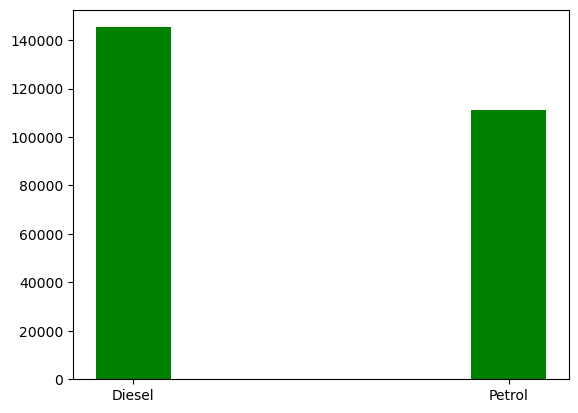

In [17]:
plt.bar(df['f_type'],df['km'],width=0.2,color='green')

{'whiskers': [<matplotlib.lines.Line2D at 0x2667b6b47d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2667b6b4a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2667b6b4690>],
 'medians': [<matplotlib.lines.Line2D at 0x2667b6b4cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2667b6b4e10>],
 'means': []}

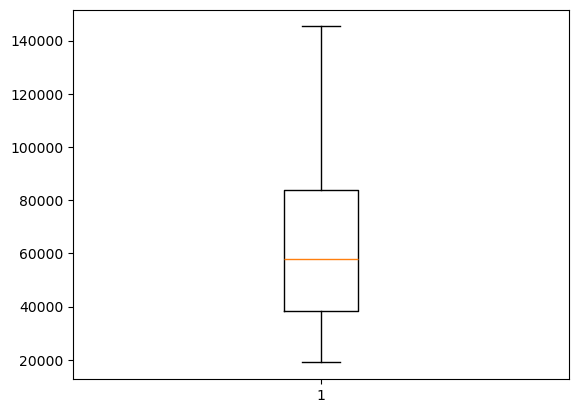

In [18]:
plt.boxplot(df['km'])

In [19]:
import numpy as np
mean = np.mean(df['km'])
std_dev = np.std(df['km'])

z_score = (df['km'] - mean)/std_dev
outliers = df['km'][np.abs(z_score) >2]
outliers

6289    145278
Name: km, dtype: int64

In [20]:
df.groupby('Location')['Price'].mean()

Location
Ahmedabad     31.428571
Bangalore      5.950000
Chennai        6.716667
Coimbatore    10.255000
Delhi         13.505714
Hyderabad     11.592143
Jaipur        14.829524
Kochi         13.879524
Kolkata       16.267429
Mumbai        12.096667
Pune          25.742857
Name: Price, dtype: float64

In [21]:
df.groupby('Location')['Price'].mean().sort_values()

Location
Bangalore      5.950000
Chennai        6.716667
Coimbatore    10.255000
Hyderabad     11.592143
Mumbai        12.096667
Delhi         13.505714
Kochi         13.879524
Jaipur        14.829524
Kolkata       16.267429
Pune          25.742857
Ahmedabad     31.428571
Name: Price, dtype: float64

In [22]:
df.groupby('Location')['Price'].mean().sort_values(ascending=False)

Location
Ahmedabad     31.428571
Pune          25.742857
Kolkata       16.267429
Jaipur        14.829524
Kochi         13.879524
Delhi         13.505714
Mumbai        12.096667
Hyderabad     11.592143
Coimbatore    10.255000
Chennai        6.716667
Bangalore      5.950000
Name: Price, dtype: float64

<Axes: xlabel='Location'>

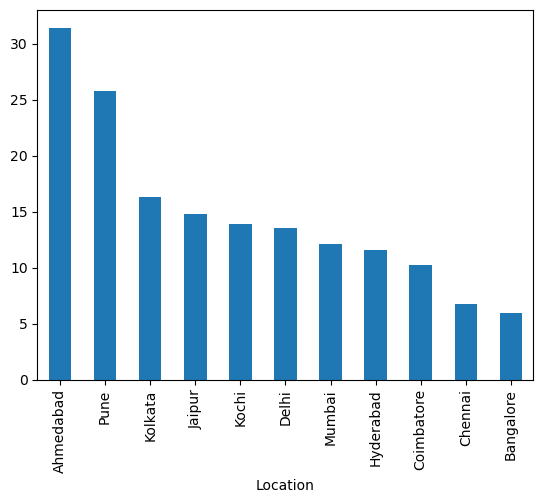

In [23]:
df.groupby('Location')['Price'].mean().sort_values(ascending=False).plot.bar()

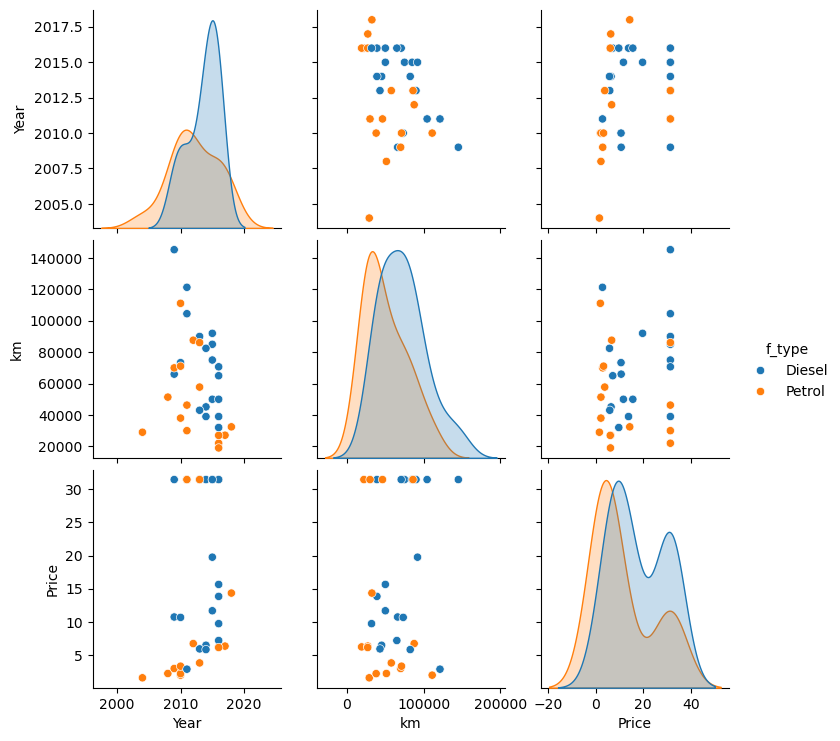

In [24]:
import seaborn as sns
# sns.pairplot(data=df)
sns.pairplot(data=df,hue='f_type')

In [25]:
##########################

In [ ]:
Recap
--------
Pyspark
 - Key components - Python + Java(JVM) + Hadoop 
         pyspark - use lib Py4j 

from pyspark.sql import SparkSession
SparkSession.builder.appName("demo1").getOrCreate() // 
|
|->DataFrame |->RDD 
--------------------// transformation ->action

df1 = spark.read.csv("prod.csv",header=True) -- from local node
df2 = spark.read.csv("hdfs://namenode:9000/prod.csv",header=True) -- from HDFS
df3 = spark.read.csv("s3a://bucket/data.csv") -- from Cloud 

Batch Processing
------------------
Process - finite data(complete dataset) - stored in DB/file 

df = pd.read_csv("emp.csv")
df.shape ------> 10,5 --- executed on 10:34 

vi emp.csv
...
...
:wq

df.shape ----> 10,5  --- executed on 11:00

Strem Processing
--------------------
Process - infinite data (or) real-time data

 +-----------------------------
 | Streaming Source <== socket,file,kafa ... (Input source)
 | -------|-------------
 |  Spark Structured Streamming
 |   ( Transformation )
 +--------|-------------
 | Streming Sink --> Console,HDFS,Delte Lake,Kafa ...(Output Sink)
 +------------------------------

Stream output modes
 |->append mode -- adds only new records/row to result table  - not using aggregate method
 |->update mode -- increment value/recent value  - aggregate
 |->complete mode -- full value - aggregate

1st - spark session object
2nd - input_mode # spark session object interface to inputmode ->df
3rd - df.do_transformation ->result
4th - result ->Sink_to_output

Data Stream                         Unbound Table
--------------                     ------------
  --------------> ------>          [][][][][]  ---| SparkCore |--->output sinks
                                   input_batches (micro-batches)


socket stream
file stream
===========
1. define schema - input_file ->prod.csv (pid,pname,pcost)
                                            | |     |
                                           define inputFile
2. read stream from a directory/folder

3. process

4. output sink

ex: input_data/
        data1.csv
          |->name,age,city
        data2.csv
          |->name,age,city
        data3.csv
          |->name,age,city,contact,address <---


define schema 
--------------
from pyspark.sql.types import StructType,StructField,StringType,IntegerType 

schema = StructType([StructField('name',StringType(),True),
            StructField('age',IntegerType(),True),
            StructField('city',StringType(),True)])

spark.readStream.option("header","true").schema(schema).csv("input_data/") ->file_stream

############################################
Tasks
======
stream from a socket  ->aggregate --> write to CSV file
|
1st step - load pyspark module 
|
2nd step - Create sparkSession
|
3rd step - Read streaming data from Socket
|
4th step - query / processs
|
5th step - write streaming to CSV file

     Note: file sink (outputsink) - don't use complete mode - use append / update - for aggregation
           format().option("path","output_data/").start()

------------
RDD
|
Input_Stream - Socket 
    | 
    process
     | ===> 
    output sink is DB
                 ----
                  |-> create separate function (ex: write_to_sql)
                                       |->take argument - records 
                                       sqlite3.connect("stream.db") 


sc = SparkContext("local[*]","StreamtoDB")

obj = StreamContext(sc,2)

socket_stream=obj.SocketTextStream("localhost",1100)
   |
map(lambda a:a.strip())
  |
foreachRDD(lambda rdd: write_to_sql(rdd.collect()))

obj.start()
obj.awaitTermination()


df = spark.readStream.format("kafka").option("").option("kafka.bootstrap.servers","localhost:9092").load()
  ...
 ...
result.writeStream.format("console").outputMode("update").start()
#################################################################################################################
Airflow 
-------
 |->Schedule workflow (DAGs)
 |->data pipelines
 |->monitor tasks and dependencies 

Open-Source tool - schedule and monitor workflow (data - pipeline)
                      |->daily,hourly,custom schedule

ex: On Linux ->cronjob 

|->airflow - programming way job schedule and monitor (webUI)
               |
               |-->python 
code sequence -->their dependencies ->schedule ->run ->monitor(webUI)

|->DAG 
[task1] ->[task2] ->[task3] ->[task4] //there is no reverse ; no looping 

task - code
|-> operators - pre-defined templates for task 
        |->BashOperator - execute a bash command/script
        |->PythonOperator - (@task decorator) - funtion
        ..
|-> excutor / workers - instance 

|-> webUI
|-> services 
        |->scheduler <== airflow scheduler
        |->webserver <== airflow webserver --port 8080

===========================================================
airflow/
        |->logs/
        |->data/
        |->dags/ <== 
            |<--- dagscript.py

create airflow login
------------------------
airflow users create --username <admin> --firstname Admin --lastname user --role admin --email admin@example.com --password <passwd>{enter}
|
Login:
password:

dagscript.py
  |
  from airflow import DAG

  DAG(<define a DAG>)
                 |->name of the DAG,default_args,schedule_interval


After finished airflow installation -->initialize airflow metadata DB

metadata
    ->DAG definitions
              |->scheduler,time interval,owner of the job,start
    ->Task runs
       |->state(success/failed)
     ->logs - job execution
     ->internal DB (default:SQLite)

In [ ]:
root@paka:~#
root@paka:~# python3 -m venv lab2
root@paka:~# source lab2/bin/activate
(lab2) root@paka:~#
(lab2) root@paka:~# export AIRFLOW_VERSION=2.10.1
(lab2) root@paka:~# export PYTHON_VERSION="$(python --version|cut -d" " -f2|cut -d"." -f 1,2)"
(lab2) root@paka:~# export CONSTRAINT_URL="https://raw.githubusercontent.com/apache/airflow/constraints-${AIRFLOW_VERSION}/constraints-${PYTHON_VERSION}.txt"
(lab2) root@paka:~# ls
demo1.py   demo2.py  demo4.py  demo6.py  demo8.py  lab2      pyspark-env
demo10.py  demo3.py  demo5.py  demo7.py  demo9.py  prod.csv  streaming_examples
(lab2) root@paka:~#
(lab2) root@paka:~# pip install "apache-airflow == ${AIRFLOW_VERSION}" --constraint "${CONSTRAINT_URL}"
Collecting apache-airflow==2.10.1
  Downloading apache_airflow-2.10.1-py3-none-any.whl.metadata (44 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 1.6 MB/s eta 0:00:00
Collecting alembic<2.0,>=1.13.1 (from apache-airflow==2.10.1)
  Downloading alembic-1.13.2-py3-none-any.whl.metadata (7.4 kB)
Collecting argcomplete>=1.10 (from apache-airflow==2.10.1)
  Downloading argcomplete-3.5.0-py3-none-any.whl.metadata (16 kB)
Collecting asgiref>=2.3.0 (from apache-airflow==2.10.1)
  Downloading asgiref-3.8.1-py3-none-any.whl.metadata (9.3 kB)
Collecting attrs>=22.1.0 (from apache-airflow==2.10.1)
  Downloading attrs-24.2.0-py3-none-any.whl.metadata (11 kB)
Collecting blinker>=1.6.2 (from apache-airflow==2.10.1)
  Downloading blinker-1.8.2-py3-none-any.whl.metadata (1.6 kB)
Collecting colorlog>=6.8.2 (from apache-airflow==2.10.1)
  Downloading colorlog-6.8.2-py3-none-any.whl.metadata (10 kB)
Collecting configupdater>=3.1.1 (from apache-airflow==2.10.1)
  Downloading ConfigUpdater-3.2-py2.py3-none-any.whl.metadata (10 kB)
Collecting connexion<3.0,>=2.14.2 (from connexion[flask]<3.0,>=2.14.2->apache-airflow==2.10.1)
  Downloading connexion-2.14.2-py2.py3-none-any.whl.metadata (28 kB)
Collecting cron-descriptor>=1.2.24 (from apache-airflow==2.10.1)
  Downloading cron_descriptor-1.4.5-py3-none-any.whl.metadata (5.7 kB)
Collecting croniter>=2.0.2 (from apache-airflow==2.10.1)
  Downloading croniter-3.0.3-py2.py3-none-any.whl.metadata (28 kB)
Collecting cryptography>=41.0.0 (from apache-airflow==2.10.1)
  Downloading cryptography-42.0.8-cp39-abi3-manylinux_2_28_x86_64.whl.metadata (5.3 kB)
Collecting deprecated>=1.2.13 (from apache-airflow==2.10.1)
  Downloading Deprecated-1.2.14-py2.py3-none-any.whl.metadata (5.4 kB)
Collecting dill>=0.2.2 (from apache-airflow==2.10.1)
  Downloading dill-0.3.8-py3-none-any.whl.metadata (10 kB)
Collecting flask-caching>=2.0.0 (from apache-airflow==2.10.1)
  Downloading Flask_Caching-2.3.0-py3-none-any.whl.metadata (2.2 kB)
Collecting flask-session<0.6,>=0.4.0 (from apache-airflow==2.10.1)
  Downloading flask_session-0.5.0-py3-none-any.whl.metadata (1.4 kB)
Collecting flask-wtf>=1.1.0 (from apache-airflow==2.10.1)
  Downloading flask_wtf-1.2.1-py3-none-any.whl.metadata (3.4 kB)
Collecting flask<2.3,>=2.2.1 (from apache-airflow==2.10.1)
  Downloading Flask-2.2.5-py3-none-any.whl.metadata (3.9 kB)
Collecting fsspec>=2023.10.0 (from apache-airflow==2.10.1)
  Downloading fsspec-2024.6.1-py3-none-any.whl.metadata (11 kB)
Collecting google-re2>=1.1 (from apache-airflow==2.10.1)
  Downloading google_re2-1.1.20240702-1-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (2.2 kB)
Collecting gunicorn>=20.1.0 (from apache-airflow==2.10.1)
  Downloading gunicorn-23.0.0-py3-none-any.whl.metadata (4.4 kB)
Collecting httpx>=0.25.0 (from apache-airflow==2.10.1)
  Downloading httpx-0.27.0-py3-none-any.whl.metadata (7.2 kB)
Collecting itsdangerous>=2.0 (from apache-airflow==2.10.1)
  Downloading itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
Collecting jinja2>=3.0.0 (from apache-airflow==2.10.1)
  Downloading jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
Collecting jsonschema>=4.18.0 (from apache-airflow==2.10.1)
  Downloading jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
Collecting lazy-object-proxy>=1.2.0 (from apache-airflow==2.10.1)
  Downloading lazy_object_proxy-1.10.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.8 kB)
Collecting linkify-it-py>=2.0.0 (from apache-airflow==2.10.1)
  Downloading linkify_it_py-2.0.3-py3-none-any.whl.metadata (8.5 kB)
Collecting lockfile>=0.12.2 (from apache-airflow==2.10.1)
  Downloading lockfile-0.12.2-py2.py3-none-any.whl.metadata (2.4 kB)
Collecting markdown-it-py>=2.1.0 (from apache-airflow==2.10.1)
  Downloading markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
Collecting markupsafe>=1.1.1 (from apache-airflow==2.10.1)
  Downloading MarkupSafe-2.1.5-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.0 kB)
Collecting marshmallow-oneofschema>=2.0.1 (from apache-airflow==2.10.1)
  Downloading marshmallow_oneofschema-3.1.1-py3-none-any.whl.metadata (5.0 kB)
Collecting mdit-py-plugins>=0.3.0 (from apache-airflow==2.10.1)
  Downloading mdit_py_plugins-0.4.1-py3-none-any.whl.metadata (2.8 kB)
Collecting methodtools>=0.4.7 (from apache-airflow==2.10.1)
  Downloading methodtools-0.4.7-py2.py3-none-any.whl.metadata (3.0 kB)
Collecting opentelemetry-api>=1.15.0 (from apache-airflow==2.10.1)
  Downloading opentelemetry_api-1.27.0-py3-none-any.whl.metadata (1.4 kB)
Collecting opentelemetry-exporter-otlp>=1.15.0 (from apache-airflow==2.10.1)
  Downloading opentelemetry_exporter_otlp-1.27.0-py3-none-any.whl.metadata (2.3 kB)
Collecting packaging>=23.0 (from apache-airflow==2.10.1)
  Downloading packaging-24.1-py3-none-any.whl.metadata (3.2 kB)
Collecting pathspec>=0.9.0 (from apache-airflow==2.10.1)
  Downloading pathspec-0.12.1-py3-none-any.whl.metadata (21 kB)
Collecting pendulum<4.0,>=3.0.0 (from apache-airflow==2.10.1)
  Downloading pendulum-3.0.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.9 kB)
Collecting pluggy>=1.5.0 (from apache-airflow==2.10.1)
  Downloading pluggy-1.5.0-py3-none-any.whl.metadata (4.8 kB)
Collecting psutil>=5.8.0 (from apache-airflow==2.10.1)
  Downloading psutil-6.0.0-cp36-abi3-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (21 kB)
Collecting pygments>=2.0.1 (from apache-airflow==2.10.1)
  Downloading pygments-2.18.0-py3-none-any.whl.metadata (2.5 kB)
Collecting pyjwt>=2.0.0 (from apache-airflow==2.10.1)
  Downloading PyJWT-2.9.0-py3-none-any.whl.metadata (3.0 kB)
Collecting python-daemon>=3.0.0 (from apache-airflow==2.10.1)
  Downloading python_daemon-3.0.1-py3-none-any.whl.metadata (2.2 kB)
Collecting python-dateutil>=2.7.0 (from apache-airflow==2.10.1)
  Downloading python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
Collecting python-nvd3>=0.15.0 (from apache-airflow==2.10.1)
  Downloading python-nvd3-0.16.0.tar.gz (34 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Collecting python-slugify>=5.0 (from apache-airflow==2.10.1)
  Downloading python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
Collecting requests<3,>=2.27.0 (from apache-airflow==2.10.1)
  Downloading requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
Collecting requests-toolbelt>=0.4.0 (from apache-airflow==2.10.1)
  Downloading requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
Collecting rfc3339-validator>=0.1.4 (from apache-airflow==2.10.1)
  Downloading rfc3339_validator-0.1.4-py2.py3-none-any.whl.metadata (1.5 kB)
Collecting rich-argparse>=1.0.0 (from apache-airflow==2.10.1)
  Downloading rich_argparse-1.5.2-py3-none-any.whl.metadata (14 kB)
Collecting rich>=12.4.4 (from apache-airflow==2.10.1)
  Downloading rich-13.8.0-py3-none-any.whl.metadata (18 kB)
Collecting setproctitle>=1.3.3 (from apache-airflow==2.10.1)
  Downloading setproctitle-1.3.3-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.9 kB)
Collecting sqlalchemy<2.0,>=1.4.36 (from apache-airflow==2.10.1)
  Downloading SQLAlchemy-1.4.53-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
Collecting sqlalchemy-jsonfield>=1.0 (from apache-airflow==2.10.1)
  Downloading SQLAlchemy_JSONField-1.0.2-py3-none-any.whl.metadata (5.2 kB)
Collecting tabulate>=0.7.5 (from apache-airflow==2.10.1)
  Downloading tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
Collecting tenacity!=8.2.0,>=8.0.0 (from apache-airflow==2.10.1)
  Downloading tenacity-8.5.0-py3-none-any.whl.metadata (1.2 kB)
Collecting termcolor>=1.1.0 (from apache-airflow==2.10.1)
  Downloading termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
Collecting unicodecsv>=0.14.1 (from apache-airflow==2.10.1)
  Downloading unicodecsv-0.14.1.tar.gz (10 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Collecting universal-pathlib>=0.2.2 (from apache-airflow==2.10.1)
  Downloading universal_pathlib-0.2.3-py3-none-any.whl.metadata (25 kB)
Collecting werkzeug<3,>=2.0 (from apache-airflow==2.10.1)
  Downloading Werkzeug-2.2.3-py3-none-any.whl.metadata (4.4 kB)
Collecting apache-airflow-providers-common-compat (from apache-airflow==2.10.1)
  Downloading apache_airflow_providers_common_compat-1.2.0-py3-none-any.whl.metadata (4.8 kB)
Collecting apache-airflow-providers-common-io (from apache-airflow==2.10.1)
  Downloading apache_airflow_providers_common_io-1.4.0-py3-none-any.whl.metadata (6.1 kB)
Collecting apache-airflow-providers-common-sql (from apache-airflow==2.10.1)
  Downloading apache_airflow_providers_common_sql-1.16.0-py3-none-any.whl.metadata (6.2 kB)
Collecting apache-airflow-providers-fab>=1.0.2 (from apache-airflow==2.10.1)
  Downloading apache_airflow_providers_fab-1.3.0-py3-none-any.whl.metadata (5.0 kB)
Collecting apache-airflow-providers-ftp (from apache-airflow==2.10.1)
  Downloading apache_airflow_providers_ftp-3.11.0-py3-none-any.whl.metadata (6.1 kB)
Collecting apache-airflow-providers-http (from apache-airflow==2.10.1)
  Downloading apache_airflow_providers_http-4.13.0-py3-none-any.whl.metadata (4.9 kB)
Collecting apache-airflow-providers-imap (from apache-airflow==2.10.1)
  Downloading apache_airflow_providers_imap-3.7.0-py3-none-any.whl.metadata (4.7 kB)
Collecting apache-airflow-providers-smtp (from apache-airflow==2.10.1)
  Downloading apache_airflow_providers_smtp-1.8.0-py3-none-any.whl.metadata (4.7 kB)
Collecting apache-airflow-providers-sqlite (from apache-airflow==2.10.1)
  Downloading apache_airflow_providers_sqlite-3.9.0-py3-none-any.whl.metadata (6.0 kB)
Collecting Mako (from alembic<2.0,>=1.13.1->apache-airflow==2.10.1)
  Downloading Mako-1.3.5-py3-none-any.whl.metadata (2.9 kB)
Collecting typing-extensions>=4 (from alembic<2.0,>=1.13.1->apache-airflow==2.10.1)
  Downloading typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
Collecting flask-appbuilder==4.5.0 (from apache-airflow-providers-fab>=1.0.2->apache-airflow==2.10.1)
  Downloading Flask_AppBuilder-4.5.0-py3-none-any.whl.metadata (8.8 kB)
Collecting flask-login>=0.6.2 (from apache-airflow-providers-fab>=1.0.2->apache-airflow==2.10.1)
  Downloading Flask_Login-0.6.3-py3-none-any.whl.metadata (5.8 kB)
Collecting jmespath>=0.7.0 (from apache-airflow-providers-fab>=1.0.2->apache-airflow==2.10.1)
  Downloading jmespath-0.10.0-py2.py3-none-any.whl.metadata (8.0 kB)
Collecting apispec<7,>=6.0.0 (from apispec[yaml]<7,>=6.0.0->flask-appbuilder==4.5.0->apache-airflow-providers-fab>=1.0.2->apache-airflow==2.10.1)
  Downloading apispec-6.6.1-py3-none-any.whl.metadata (10 kB)
Collecting colorama<1,>=0.3.9 (from flask-appbuilder==4.5.0->apache-airflow-providers-fab>=1.0.2->apache-airflow==2.10.1)
  Downloading colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
Collecting click<9,>=8 (from flask-appbuilder==4.5.0->apache-airflow-providers-fab>=1.0.2->apache-airflow==2.10.1)
  Downloading click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
Collecting email-validator>=1.0.5 (from flask-appbuilder==4.5.0->apache-airflow-providers-fab>=1.0.2->apache-airflow==2.10.1)
  Downloading email_validator-2.2.0-py3-none-any.whl.metadata (25 kB)
Collecting Flask-Babel<3,>=1 (from flask-appbuilder==4.5.0->apache-airflow-providers-fab>=1.0.2->apache-airflow==2.10.1)
  Downloading Flask_Babel-2.0.0-py3-none-any.whl.metadata (2.1 kB)
Collecting Flask-Limiter<4,>3 (from flask-appbuilder==4.5.0->apache-airflow-providers-fab>=1.0.2->apache-airflow==2.10.1)
  Downloading Flask_Limiter-3.8.0-py3-none-any.whl.metadata (6.1 kB)
Collecting Flask-SQLAlchemy<3,>=2.4 (from flask-appbuilder==4.5.0->apache-airflow-providers-fab>=1.0.2->apache-airflow==2.10.1)
  Downloading Flask_SQLAlchemy-2.5.1-py2.py3-none-any.whl.metadata (3.1 kB)
Collecting Flask-JWT-Extended<5.0.0,>=4.0.0 (from flask-appbuilder==4.5.0->apache-airflow-providers-fab>=1.0.2->apache-airflow==2.10.1)
  Downloading Flask_JWT_Extended-4.6.0-py2.py3-none-any.whl.metadata (3.9 kB)
Collecting marshmallow<4,>=3.18.0 (from flask-appbuilder==4.5.0->apache-airflow-providers-fab>=1.0.2->apache-airflow==2.10.1)
  Downloading marshmallow-3.22.0-py3-none-any.whl.metadata (7.2 kB)
Collecting marshmallow-sqlalchemy<0.29.0,>=0.22.0 (from flask-appbuilder==4.5.0->apache-airflow-providers-fab>=1.0.2->apache-airflow==2.10.1)
  Downloading marshmallow_sqlalchemy-0.28.2-py2.py3-none-any.whl.metadata (6.8 kB)
Collecting prison<1.0.0,>=0.2.1 (from flask-appbuilder==4.5.0->apache-airflow-providers-fab>=1.0.2->apache-airflow==2.10.1)
  Downloading prison-0.2.1-py2.py3-none-any.whl.metadata (973 bytes)
Collecting sqlalchemy-utils<1,>=0.32.21 (from flask-appbuilder==4.5.0->apache-airflow-providers-fab>=1.0.2->apache-airflow==2.10.1)
  Downloading SQLAlchemy_Utils-0.41.2-py3-none-any.whl.metadata (4.2 kB)
Collecting WTForms<4 (from flask-appbuilder==4.5.0->apache-airflow-providers-fab>=1.0.2->apache-airflow==2.10.1)
  Downloading wtforms-3.1.2-py3-none-any.whl.metadata (5.3 kB)
Collecting clickclick<21,>=1.2 (from connexion<3.0,>=2.14.2->connexion[flask]<3.0,>=2.14.2->apache-airflow==2.10.1)
  Downloading clickclick-20.10.2-py2.py3-none-any.whl.metadata (7.6 kB)
Collecting PyYAML<7,>=5.1 (from connexion<3.0,>=2.14.2->connexion[flask]<3.0,>=2.14.2->apache-airflow==2.10.1)
  Downloading PyYAML-6.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
Collecting inflection<0.6,>=0.3.1 (from connexion<3.0,>=2.14.2->connexion[flask]<3.0,>=2.14.2->apache-airflow==2.10.1)
  Downloading inflection-0.5.1-py2.py3-none-any.whl.metadata (1.7 kB)
Collecting pytz>2021.1 (from croniter>=2.0.2->apache-airflow==2.10.1)
  Downloading pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
Collecting cffi>=1.12 (from cryptography>=41.0.0->apache-airflow==2.10.1)
  Downloading cffi-1.17.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.5 kB)
Collecting wrapt<2,>=1.10 (from deprecated>=1.2.13->apache-airflow==2.10.1)
  Downloading wrapt-1.16.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.6 kB)
Collecting cachelib<0.10.0,>=0.9.0 (from flask-caching>=2.0.0->apache-airflow==2.10.1)
  Downloading cachelib-0.9.0-py3-none-any.whl.metadata (1.9 kB)
Collecting anyio (from httpx>=0.25.0->apache-airflow==2.10.1)
  Downloading anyio-4.4.0-py3-none-any.whl.metadata (4.6 kB)
Collecting certifi (from httpx>=0.25.0->apache-airflow==2.10.1)
  Downloading certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
Collecting httpcore==1.* (from httpx>=0.25.0->apache-airflow==2.10.1)
  Downloading httpcore-1.0.5-py3-none-any.whl.metadata (20 kB)
Collecting idna (from httpx>=0.25.0->apache-airflow==2.10.1)
  Downloading idna-3.8-py3-none-any.whl.metadata (9.9 kB)
Collecting sniffio (from httpx>=0.25.0->apache-airflow==2.10.1)
  Downloading sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
Collecting h11<0.15,>=0.13 (from httpcore==1.*->httpx>=0.25.0->apache-airflow==2.10.1)
  Downloading h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
Collecting jsonschema-specifications>=2023.03.6 (from jsonschema>=4.18.0->apache-airflow==2.10.1)
  Downloading jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
Collecting referencing>=0.28.4 (from jsonschema>=4.18.0->apache-airflow==2.10.1)
  Downloading referencing-0.35.1-py3-none-any.whl.metadata (2.8 kB)
Collecting rpds-py>=0.7.1 (from jsonschema>=4.18.0->apache-airflow==2.10.1)
  Downloading rpds_py-0.20.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
Collecting uc-micro-py (from linkify-it-py>=2.0.0->apache-airflow==2.10.1)
  Downloading uc_micro_py-1.0.3-py3-none-any.whl.metadata (2.0 kB)
Collecting mdurl~=0.1 (from markdown-it-py>=2.1.0->apache-airflow==2.10.1)
  Downloading mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
Collecting wirerope>=0.4.7 (from methodtools>=0.4.7->apache-airflow==2.10.1)
  Downloading wirerope-0.4.7-py2.py3-none-any.whl.metadata (2.8 kB)
Collecting importlib-metadata<=8.4.0,>=6.0 (from opentelemetry-api>=1.15.0->apache-airflow==2.10.1)
  Downloading importlib_metadata-6.11.0-py3-none-any.whl.metadata (4.9 kB)
Collecting opentelemetry-exporter-otlp-proto-grpc==1.27.0 (from opentelemetry-exporter-otlp>=1.15.0->apache-airflow==2.10.1)
  Downloading opentelemetry_exporter_otlp_proto_grpc-1.27.0-py3-none-any.whl.metadata (2.3 kB)
Collecting opentelemetry-exporter-otlp-proto-http==1.27.0 (from opentelemetry-exporter-otlp>=1.15.0->apache-airflow==2.10.1)
  Downloading opentelemetry_exporter_otlp_proto_http-1.27.0-py3-none-any.whl.metadata (2.3 kB)
Collecting googleapis-common-protos~=1.52 (from opentelemetry-exporter-otlp-proto-grpc==1.27.0->opentelemetry-exporter-otlp>=1.15.0->apache-airflow==2.10.1)
  Downloading googleapis_common_protos-1.65.0-py2.py3-none-any.whl.metadata (1.5 kB)
Collecting grpcio<2.0.0,>=1.0.0 (from opentelemetry-exporter-otlp-proto-grpc==1.27.0->opentelemetry-exporter-otlp>=1.15.0->apache-airflow==2.10.1)
  Downloading grpcio-1.66.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.9 kB)
Collecting opentelemetry-exporter-otlp-proto-common==1.27.0 (from opentelemetry-exporter-otlp-proto-grpc==1.27.0->opentelemetry-exporter-otlp>=1.15.0->apache-airflow==2.10.1)
  Downloading opentelemetry_exporter_otlp_proto_common-1.27.0-py3-none-any.whl.metadata (1.8 kB)
Collecting opentelemetry-proto==1.27.0 (from opentelemetry-exporter-otlp-proto-grpc==1.27.0->opentelemetry-exporter-otlp>=1.15.0->apache-airflow==2.10.1)
  Downloading opentelemetry_proto-1.27.0-py3-none-any.whl.metadata (2.3 kB)
Collecting opentelemetry-sdk~=1.27.0 (from opentelemetry-exporter-otlp-proto-grpc==1.27.0->opentelemetry-exporter-otlp>=1.15.0->apache-airflow==2.10.1)
  Downloading opentelemetry_sdk-1.27.0-py3-none-any.whl.metadata (1.5 kB)
Collecting protobuf<5.0,>=3.19 (from opentelemetry-proto==1.27.0->opentelemetry-exporter-otlp-proto-grpc==1.27.0->opentelemetry-exporter-otlp>=1.15.0->apache-airflow==2.10.1)
  Downloading protobuf-4.25.4-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
Collecting tzdata>=2020.1 (from pendulum<4.0,>=3.0.0->apache-airflow==2.10.1)
  Downloading tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Collecting time-machine>=2.6.0 (from pendulum<4.0,>=3.0.0->apache-airflow==2.10.1)
  Downloading time_machine-2.15.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (21 kB)
Collecting docutils (from python-daemon>=3.0.0->apache-airflow==2.10.1)
  Downloading docutils-0.16-py2.py3-none-any.whl.metadata (2.7 kB)
Collecting setuptools>=62.4.0 (from python-daemon>=3.0.0->apache-airflow==2.10.1)
  Downloading setuptools-74.0.0-py3-none-any.whl.metadata (6.7 kB)
Collecting six>=1.5 (from python-dateutil>=2.7.0->apache-airflow==2.10.1)
  Downloading six-1.16.0-py2.py3-none-any.whl.metadata (1.8 kB)
Collecting text-unidecode>=1.3 (from python-slugify>=5.0->apache-airflow==2.10.1)
  Downloading text_unidecode-1.3-py2.py3-none-any.whl.metadata (2.4 kB)
Collecting charset-normalizer<4,>=2 (from requests<3,>=2.27.0->apache-airflow==2.10.1)
  Downloading charset_normalizer-3.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (33 kB)
Collecting urllib3<3,>=1.21.1 (from requests<3,>=2.27.0->apache-airflow==2.10.1)
  Downloading urllib3-2.2.2-py3-none-any.whl.metadata (6.4 kB)
Collecting greenlet!=0.4.17 (from sqlalchemy<2.0,>=1.4.36->apache-airflow==2.10.1)
  Downloading greenlet-3.0.3-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (3.8 kB)
Collecting more-itertools>=9.0.0 (from apache-airflow-providers-common-sql->apache-airflow==2.10.1)
  Downloading more_itertools-10.4.0-py3-none-any.whl.metadata (36 kB)
Collecting sqlparse>=0.4.2 (from apache-airflow-providers-common-sql->apache-airflow==2.10.1)
  Downloading sqlparse-0.5.1-py3-none-any.whl.metadata (3.9 kB)
Collecting aiohttp>=3.9.2 (from apache-airflow-providers-http->apache-airflow==2.10.1)
  Downloading aiohttp-3.10.5-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.5 kB)
Collecting aiohappyeyeballs>=2.3.0 (from aiohttp>=3.9.2->apache-airflow-providers-http->apache-airflow==2.10.1)
  Downloading aiohappyeyeballs-2.4.0-py3-none-any.whl.metadata (5.9 kB)
Collecting aiosignal>=1.1.2 (from aiohttp>=3.9.2->apache-airflow-providers-http->apache-airflow==2.10.1)
  Downloading aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
Collecting frozenlist>=1.1.1 (from aiohttp>=3.9.2->apache-airflow-providers-http->apache-airflow==2.10.1)
  Downloading frozenlist-1.4.1-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Collecting multidict<7.0,>=4.5 (from aiohttp>=3.9.2->apache-airflow-providers-http->apache-airflow==2.10.1)
  Downloading multidict-6.0.5-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
Collecting yarl<2.0,>=1.0 (from aiohttp>=3.9.2->apache-airflow-providers-http->apache-airflow==2.10.1)
  Downloading yarl-1.9.7-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (39 kB)
Collecting pycparser (from cffi>=1.12->cryptography>=41.0.0->apache-airflow==2.10.1)
  Downloading pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
Collecting zipp>=0.5 (from importlib-metadata<=8.4.0,>=6.0->opentelemetry-api>=1.15.0->apache-airflow==2.10.1)
  Downloading zipp-3.20.1-py3-none-any.whl.metadata (3.7 kB)
Collecting dnspython>=2.0.0 (from email-validator>=1.0.5->flask-appbuilder==4.5.0->apache-airflow-providers-fab>=1.0.2->apache-airflow==2.10.1)
  Downloading dnspython-2.6.1-py3-none-any.whl.metadata (5.8 kB)
Collecting Babel>=2.3 (from Flask-Babel<3,>=1->flask-appbuilder==4.5.0->apache-airflow-providers-fab>=1.0.2->apache-airflow==2.10.1)
  Downloading babel-2.16.0-py3-none-any.whl.metadata (1.5 kB)
Collecting limits>=3.13 (from Flask-Limiter<4,>3->flask-appbuilder==4.5.0->apache-airflow-providers-fab>=1.0.2->apache-airflow==2.10.1)
  Downloading limits-3.13.0-py3-none-any.whl.metadata (7.2 kB)
Collecting ordered-set<5,>4 (from Flask-Limiter<4,>3->flask-appbuilder==4.5.0->apache-airflow-providers-fab>=1.0.2->apache-airflow==2.10.1)
  Downloading ordered_set-4.1.0-py3-none-any.whl.metadata (5.3 kB)
Collecting opentelemetry-semantic-conventions==0.48b0 (from opentelemetry-sdk~=1.27.0->opentelemetry-exporter-otlp-proto-grpc==1.27.0->opentelemetry-exporter-otlp>=1.15.0->apache-airflow==2.10.1)
  Downloading opentelemetry_semantic_conventions-0.48b0-py3-none-any.whl.metadata (2.4 kB)
Collecting importlib-resources>=1.3 (from limits>=3.13->Flask-Limiter<4,>3->flask-appbuilder==4.5.0->apache-airflow-providers-fab>=1.0.2->apache-airflow==2.10.1)
  Downloading importlib_resources-6.4.4-py3-none-any.whl.metadata (4.0 kB)
Downloading apache_airflow-2.10.1-py3-none-any.whl (13.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 55.1 MB/s eta 0:00:00
Downloading alembic-1.13.2-py3-none-any.whl (232 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 12.5 MB/s eta 0:00:00
Downloading apache_airflow_providers_fab-1.3.0-py3-none-any.whl (80 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.1/80.1 kB 5.4 MB/s eta 0:00:00
Downloading Flask_AppBuilder-4.5.0-py3-none-any.whl (2.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.2 MB/s eta 0:00:00
Downloading argcomplete-3.5.0-py3-none-any.whl (43 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.1 MB/s eta 0:00:00
Downloading asgiref-3.8.1-py3-none-any.whl (23 kB)
Downloading attrs-24.2.0-py3-none-any.whl (63 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 4.0 MB/s eta 0:00:00
Downloading blinker-1.8.2-py3-none-any.whl (9.5 kB)
Downloading colorlog-6.8.2-py3-none-any.whl (11 kB)
Downloading ConfigUpdater-3.2-py2.py3-none-any.whl (34 kB)
Downloading connexion-2.14.2-py2.py3-none-any.whl (95 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 kB 5.3 MB/s eta 0:00:00
Downloading cron_descriptor-1.4.5-py3-none-any.whl (50 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
Downloading croniter-3.0.3-py2.py3-none-any.whl (22 kB)
Downloading cryptography-42.0.8-cp39-abi3-manylinux_2_28_x86_64.whl (3.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 46.9 MB/s eta 0:00:00
Downloading Deprecated-1.2.14-py2.py3-none-any.whl (9.6 kB)
Downloading dill-0.3.8-py3-none-any.whl (116 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
Downloading Flask-2.2.5-py3-none-any.whl (101 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 5.7 MB/s eta 0:00:00
Downloading Flask_Caching-2.3.0-py3-none-any.whl (28 kB)
Downloading flask_session-0.5.0-py3-none-any.whl (7.2 kB)
Downloading flask_wtf-1.2.1-py3-none-any.whl (12 kB)
Downloading fsspec-2024.6.1-py3-none-any.whl (177 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 11.4 MB/s eta 0:00:00
Downloading google_re2-1.1.20240702-1-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (546 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.8/546.8 kB 24.0 MB/s eta 0:00:00
Downloading gunicorn-23.0.0-py3-none-any.whl (85 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.5 MB/s eta 0:00:00
Downloading httpx-0.27.0-py3-none-any.whl (75 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.0 MB/s eta 0:00:00
Downloading httpcore-1.0.5-py3-none-any.whl (77 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
Downloading itsdangerous-2.2.0-py3-none-any.whl (16 kB)
Downloading jinja2-3.1.4-py3-none-any.whl (133 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 8.3 MB/s eta 0:00:00
Downloading jsonschema-4.23.0-py3-none-any.whl (88 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 5.5 MB/s eta 0:00:00
Downloading lazy_object_proxy-1.10.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (72 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 4.5 MB/s eta 0:00:00
Downloading linkify_it_py-2.0.3-py3-none-any.whl (19 kB)
Downloading lockfile-0.12.2-py2.py3-none-any.whl (13 kB)
Downloading markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 6.3 MB/s eta 0:00:00
Downloading MarkupSafe-2.1.5-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (28 kB)
Downloading marshmallow_oneofschema-3.1.1-py3-none-any.whl (5.7 kB)
Downloading mdit_py_plugins-0.4.1-py3-none-any.whl (54 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 3.6 MB/s eta 0:00:00
Downloading methodtools-0.4.7-py2.py3-none-any.whl (4.0 kB)
Downloading opentelemetry_api-1.27.0-py3-none-any.whl (63 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.7 MB/s eta 0:00:00
Downloading opentelemetry_exporter_otlp-1.27.0-py3-none-any.whl (7.0 kB)
Downloading opentelemetry_exporter_otlp_proto_grpc-1.27.0-py3-none-any.whl (18 kB)
Downloading opentelemetry_exporter_otlp_proto_http-1.27.0-py3-none-any.whl (17 kB)
Downloading opentelemetry_exporter_otlp_proto_common-1.27.0-py3-none-any.whl (17 kB)
Downloading opentelemetry_proto-1.27.0-py3-none-any.whl (52 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.5 MB/s eta 0:00:00
Downloading packaging-24.1-py3-none-any.whl (53 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 3.5 MB/s eta 0:00:00
Downloading pathspec-0.12.1-py3-none-any.whl (31 kB)
Downloading pendulum-3.0.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (384 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 18.8 MB/s eta 0:00:00
Downloading pluggy-1.5.0-py3-none-any.whl (20 kB)
Downloading psutil-6.0.0-cp36-abi3-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (290 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.5/290.5 kB 11.3 MB/s eta 0:00:00
Downloading pygments-2.18.0-py3-none-any.whl (1.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.9 MB/s eta 0:00:00
Downloading PyJWT-2.9.0-py3-none-any.whl (22 kB)
Downloading python_daemon-3.0.1-py3-none-any.whl (31 kB)
Downloading python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 12.9 MB/s eta 0:00:00
Downloading python_slugify-8.0.4-py2.py3-none-any.whl (10 kB)
Downloading requests-2.32.3-py3-none-any.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.6 MB/s eta 0:00:00
Downloading requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.8 MB/s eta 0:00:00
Downloading rfc3339_validator-0.1.4-py2.py3-none-any.whl (3.5 kB)
Downloading rich-13.8.0-py3-none-any.whl (241 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.6/241.6 kB 15.7 MB/s eta 0:00:00
Downloading rich_argparse-1.5.2-py3-none-any.whl (19 kB)
Downloading setproctitle-1.3.3-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (31 kB)
Downloading SQLAlchemy-1.4.53-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.8 MB/s eta 0:00:00
Downloading SQLAlchemy_JSONField-1.0.2-py3-none-any.whl (10 kB)
Downloading tabulate-0.9.0-py3-none-any.whl (35 kB)
Downloading tenacity-8.5.0-py3-none-any.whl (28 kB)
Downloading termcolor-2.4.0-py3-none-any.whl (7.7 kB)
Downloading universal_pathlib-0.2.3-py3-none-any.whl (48 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.0 MB/s eta 0:00:00
Downloading Werkzeug-2.2.3-py3-none-any.whl (233 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 12.5 MB/s eta 0:00:00
Downloading apache_airflow_providers_common_compat-1.2.0-py3-none-any.whl (13 kB)
Downloading apache_airflow_providers_common_io-1.4.0-py3-none-any.whl (18 kB)
Downloading apache_airflow_providers_common_sql-1.16.0-py3-none-any.whl (46 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.8 MB/s eta 0:00:00
Downloading apache_airflow_providers_ftp-3.11.0-py3-none-any.whl (19 kB)
Downloading apache_airflow_providers_http-4.13.0-py3-none-any.whl (27 kB)
Downloading apache_airflow_providers_imap-3.7.0-py3-none-any.whl (17 kB)
Downloading apache_airflow_providers_smtp-1.8.0-py3-none-any.whl (22 kB)
Downloading apache_airflow_providers_sqlite-3.9.0-py3-none-any.whl (13 kB)
Downloading aiohttp-3.10.5-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.3 MB/s eta 0:00:00
Downloading cachelib-0.9.0-py3-none-any.whl (15 kB)
Downloading certifi-2024.8.30-py3-none-any.whl (167 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 kB 12.6 MB/s eta 0:00:00
Downloading cffi-1.17.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (479 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.1/479.1 kB 23.5 MB/s eta 0:00:00
Downloading charset_normalizer-3.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (141 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.6 MB/s eta 0:00:00
Downloading click-8.1.7-py3-none-any.whl (97 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 7.3 MB/s eta 0:00:00
Downloading clickclick-20.10.2-py2.py3-none-any.whl (7.4 kB)
Downloading Flask_Login-0.6.3-py3-none-any.whl (17 kB)
Downloading greenlet-3.0.3-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (625 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 625.7/625.7 kB 22.1 MB/s eta 0:00:00
Downloading idna-3.8-py3-none-any.whl (66 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 4.6 MB/s eta 0:00:00
Downloading importlib_metadata-6.11.0-py3-none-any.whl (23 kB)
Downloading inflection-0.5.1-py2.py3-none-any.whl (9.5 kB)
Downloading jmespath-0.10.0-py2.py3-none-any.whl (24 kB)
Downloading jsonschema_specifications-2023.12.1-py3-none-any.whl (18 kB)
Downloading marshmallow-3.22.0-py3-none-any.whl (49 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.8 MB/s eta 0:00:00
Downloading mdurl-0.1.2-py3-none-any.whl (10.0 kB)
Downloading more_itertools-10.4.0-py3-none-any.whl (60 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.7 MB/s eta 0:00:00
Downloading pytz-2024.1-py2.py3-none-any.whl (505 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 17.5 MB/s eta 0:00:00
Downloading PyYAML-6.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (767 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 767.5/767.5 kB 36.2 MB/s eta 0:00:00
Downloading referencing-0.35.1-py3-none-any.whl (26 kB)
Downloading rpds_py-0.20.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (357 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.0/358.0 kB 23.3 MB/s eta 0:00:00
Downloading setuptools-74.0.0-py3-none-any.whl (1.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.1 MB/s eta 0:00:00
Downloading six-1.16.0-py2.py3-none-any.whl (11 kB)
Downloading sqlparse-0.5.1-py3-none-any.whl (44 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.7 MB/s eta 0:00:00
Downloading text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 5.9 MB/s eta 0:00:00
Downloading time_machine-2.15.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33 kB)
Downloading typing_extensions-4.12.2-py3-none-any.whl (37 kB)
Downloading tzdata-2024.1-py2.py3-none-any.whl (345 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 14.3 MB/s eta 0:00:00
Downloading urllib3-2.2.2-py3-none-any.whl (121 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 10.3 MB/s eta 0:00:00
Downloading wirerope-0.4.7-py2.py3-none-any.whl (9.0 kB)
Downloading wrapt-1.16.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (87 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 kB 5.3 MB/s eta 0:00:00
Downloading wtforms-3.1.2-py3-none-any.whl (145 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 7.3 MB/s eta 0:00:00
Downloading anyio-4.4.0-py3-none-any.whl (86 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.8 MB/s eta 0:00:00
Downloading sniffio-1.3.1-py3-none-any.whl (10 kB)
Downloading docutils-0.16-py2.py3-none-any.whl (548 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 11.7 MB/s eta 0:00:00
Downloading Mako-1.3.5-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.2 MB/s eta 0:00:00
Downloading uc_micro_py-1.0.3-py3-none-any.whl (6.2 kB)
Downloading aiohappyeyeballs-2.4.0-py3-none-any.whl (12 kB)
Downloading aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
Downloading apispec-6.6.1-py3-none-any.whl (30 kB)
Downloading colorama-0.4.6-py2.py3-none-any.whl (25 kB)
Downloading email_validator-2.2.0-py3-none-any.whl (33 kB)
Downloading Flask_Babel-2.0.0-py3-none-any.whl (9.3 kB)
Downloading Flask_JWT_Extended-4.6.0-py2.py3-none-any.whl (22 kB)
Downloading Flask_Limiter-3.8.0-py3-none-any.whl (28 kB)
Downloading Flask_SQLAlchemy-2.5.1-py2.py3-none-any.whl (17 kB)
Downloading frozenlist-1.4.1-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (281 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.5/281.5 kB 14.7 MB/s eta 0:00:00
Downloading googleapis_common_protos-1.65.0-py2.py3-none-any.whl (220 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.9/220.9 kB 13.3 MB/s eta 0:00:00
Downloading grpcio-1.66.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 53.5 MB/s eta 0:00:00
Downloading h11-0.14.0-py3-none-any.whl (58 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.4 MB/s eta 0:00:00
Downloading marshmallow_sqlalchemy-0.28.2-py2.py3-none-any.whl (16 kB)
Downloading multidict-6.0.5-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (130 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.8/130.8 kB 6.5 MB/s eta 0:00:00
Downloading opentelemetry_sdk-1.27.0-py3-none-any.whl (110 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 7.8 MB/s eta 0:00:00
Downloading opentelemetry_semantic_conventions-0.48b0-py3-none-any.whl (149 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 10.2 MB/s eta 0:00:00
Downloading prison-0.2.1-py2.py3-none-any.whl (5.8 kB)
Downloading SQLAlchemy_Utils-0.41.2-py3-none-any.whl (93 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 2.7 MB/s eta 0:00:00
Downloading yarl-1.9.7-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (510 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.9/510.9 kB 39.2 MB/s eta 0:00:00
Downloading zipp-3.20.1-py3-none-any.whl (9.0 kB)
Downloading pycparser-2.22-py3-none-any.whl (117 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.6/117.6 kB 9.0 MB/s eta 0:00:00
Downloading babel-2.16.0-py3-none-any.whl (9.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 49.8 MB/s eta 0:00:00
Downloading dnspython-2.6.1-py3-none-any.whl (307 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 17.0 MB/s eta 0:00:00
Downloading limits-3.13.0-py3-none-any.whl (45 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.6 MB/s eta 0:00:00
Downloading ordered_set-4.1.0-py3-none-any.whl (7.6 kB)
Downloading protobuf-4.25.4-cp37-abi3-manylinux2014_x86_64.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 12.9 MB/s eta 0:00:00
Downloading importlib_resources-6.4.4-py3-none-any.whl (35 kB)
Building wheels for collected packages: python-nvd3, unicodecsv
  Building wheel for python-nvd3 (pyproject.toml) ... done
  Created wheel for python-nvd3: filename=python_nvd3-0.16.0-py3-none-any.whl size=37651 sha256=157efcfbbe85768df51aa0bfd1c8c541f968cec42a22486f75ee9e3afb4ba90a
  Stored in directory: /root/.cache/pip/wheels/97/ca/3e/4acf0f36254adde4cf5654b0b4c6f922068788e397392dca49
  Building wheel for unicodecsv (pyproject.toml) ... done
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-py3-none-any.whl size=10789 sha256=43dcd3f5638f5c67d228d7937c88cdaf78434040eab8c0d718ec9534be3f97be
  Stored in directory: /root/.cache/pip/wheels/f2/67/7d/2e80818c2f3dc8f0735d0810338c47e95d3212114ab97b4ede
Successfully built python-nvd3 unicodecsv
Installing collected packages: unicodecsv, text-unidecode, pytz, lockfile, cron-descriptor, zipp, wrapt, urllib3, uc-micro-py, tzdata, typing-extensions, termcolor, tenacity, tabulate, sqlparse, sniffio, six, setuptools, setproctitle, rpds-py, PyYAML, python-slugify, pyjwt, pygments, pycparser, psutil, protobuf, pluggy, pathspec, packaging, ordered-set, multidict, more-itertools, mdurl, markupsafe, lazy-object-proxy, jmespath, itsdangerous, inflection, importlib-resources, idna, h11, grpcio, greenlet, google-re2, fsspec, frozenlist, docutils, dnspython, dill, configupdater, colorlog, colorama, click, charset-normalizer, certifi, cachelib, blinker, Babel, attrs, asgiref, argcomplete, aiohappyeyeballs, yarl, WTForms, wirerope, werkzeug, universal-pathlib, sqlalchemy, rfc3339-validator, requests, referencing, python-dateutil, python-daemon, prison, opentelemetry-proto, marshmallow, markdown-it-py, Mako, linkify-it-py, jinja2, importlib-metadata, httpcore, gunicorn, googleapis-common-protos, email-validator, deprecated, clickclick, cffi, apispec, anyio, aiosignal, time-machine, sqlalchemy-utils, sqlalchemy-jsonfield, rich, requests-toolbelt, python-nvd3, opentelemetry-exporter-otlp-proto-common, opentelemetry-api, methodtools, mdit-py-plugins, marshmallow-sqlalchemy, marshmallow-oneofschema, limits, jsonschema-specifications, httpx, flask, cryptography, croniter, alembic, aiohttp, rich-argparse, pendulum, opentelemetry-semantic-conventions, jsonschema, flask-wtf, Flask-SQLAlchemy, flask-session, flask-login, Flask-Limiter, Flask-JWT-Extended, flask-caching, Flask-Babel, opentelemetry-sdk, flask-appbuilder, connexion, opentelemetry-exporter-otlp-proto-http, opentelemetry-exporter-otlp-proto-grpc, opentelemetry-exporter-otlp, apache-airflow-providers-common-sql, apache-airflow-providers-sqlite, apache-airflow-providers-smtp, apache-airflow-providers-imap, apache-airflow-providers-http, apache-airflow-providers-ftp, apache-airflow-providers-fab, apache-airflow-providers-common-io, apache-airflow-providers-common-compat, apache-airflow

Successfully installed Babel-2.16.0 Flask-Babel-2.0.0 Flask-JWT-Extended-4.6.0 Flask-Limiter-3.8.0 Flask-SQLAlchemy-2.5.1 Mako-1.3.5 PyYAML-6.0.2 WTForms-3.1.2 aiohappyeyeballs-2.4.0 aiohttp-3.10.5 aiosignal-1.3.1 alembic-1.13.2 anyio-4.4.0 apache-airflow-2.10.1 apache-airflow-providers-common-compat-1.2.0 apache-airflow-providers-common-io-1.4.0 apache-airflow-providers-common-sql-1.16.0 apache-airflow-providers-fab-1.3.0 apache-airflow-providers-ftp-3.11.0 apache-airflow-providers-http-4.13.0 apache-airflow-providers-imap-3.7.0 apache-airflow-providers-smtp-1.8.0 apache-airflow-providers-sqlite-3.9.0 apispec-6.6.1 argcomplete-3.5.0 asgiref-3.8.1 attrs-24.2.0 blinker-1.8.2 cachelib-0.9.0 certifi-2024.8.30 cffi-1.17.0 charset-normalizer-3.3.2 click-8.1.7 clickclick-20.10.2 colorama-0.4.6 colorlog-6.8.2 configupdater-3.2 connexion-2.14.2 cron-descriptor-1.4.5 croniter-3.0.3 cryptography-42.0.8 deprecated-1.2.14 dill-0.3.8 dnspython-2.6.1 docutils-0.16 email-validator-2.2.0 flask-2.2.5 flask-appbuilder-4.5.0 flask-caching-2.3.0 flask-login-0.6.3 flask-session-0.5.0 flask-wtf-1.2.1 frozenlist-1.4.1 fsspec-2024.6.1 google-re2-1.1.20240702 googleapis-common-protos-1.65.0 greenlet-3.0.3 grpcio-1.66.1 gunicorn-23.0.0 h11-0.14.0 httpcore-1.0.5 httpx-0.27.0 idna-3.8 importlib-metadata-6.11.0 importlib-resources-6.4.4 inflection-0.5.1 itsdangerous-2.2.0 jinja2-3.1.4 jmespath-0.10.0 jsonschema-4.23.0 jsonschema-specifications-2023.12.1 lazy-object-proxy-1.10.0 limits-3.13.0 linkify-it-py-2.0.3 lockfile-0.12.2 markdown-it-py-3.0.0 markupsafe-2.1.5 marshmallow-3.22.0 marshmallow-oneofschema-3.1.1 marshmallow-sqlalchemy-0.28.2 mdit-py-plugins-0.4.1 mdurl-0.1.2 methodtools-0.4.7 more-itertools-10.4.0 multidict-6.0.5 opentelemetry-api-1.27.0 opentelemetry-exporter-otlp-1.27.0 opentelemetry-exporter-otlp-proto-common-1.27.0 opentelemetry-exporter-otlp-proto-grpc-1.27.0 opentelemetry-exporter-otlp-proto-http-1.27.0 opentelemetry-proto-1.27.0 opentelemetry-sdk-1.27.0 opentelemetry-semantic-conventions-0.48b0 ordered-set-4.1.0 packaging-24.1 pathspec-0.12.1 pendulum-3.0.0 pluggy-1.5.0 prison-0.2.1 protobuf-4.25.4 psutil-6.0.0 pycparser-2.22 pygments-2.18.0 pyjwt-2.9.0 python-daemon-3.0.1 python-dateutil-2.9.0.post0 python-nvd3-0.16.0 python-slugify-8.0.4 pytz-2024.1 referencing-0.35.1 requests-2.32.3 requests-toolbelt-1.0.0 rfc3339-validator-0.1.4 rich-13.8.0 rich-argparse-1.5.2 rpds-py-0.20.0 setproctitle-1.3.3 setuptools-74.0.0 six-1.16.0 sniffio-1.3.1 sqlalchemy-1.4.53 sqlalchemy-jsonfield-1.0.2 sqlalchemy-utils-0.41.2 sqlparse-0.5.1 tabulate-0.9.0 tenacity-8.5.0 termcolor-2.4.0 text-unidecode-1.3 time-machine-2.15.0 typing-extensions-4.12.2 tzdata-2024.1 uc-micro-py-1.0.3 unicodecsv-0.14.1 universal-pathlib-0.2.3 urllib3-2.2.2 werkzeug-2.2.3 wirerope-0.4.7 wrapt-1.16.0 yarl-1.9.7 zipp-3.20.1
(lab2) root@paka:~#
(lab2) root@paka:~# airflow version
2.10.1
(lab2) root@paka:~#
(lab2) root@paka:~#
(lab2) root@paka:~# ls
airflow   demo10.py  demo3.py  demo5.py  demo7.py  demo9.py  prod.csv     streaming_examples
demo1.py  demo2.py   demo4.py  demo6.py  demo8.py  lab2      pyspark-env
(lab2) root@paka:~#
(lab2) root@paka:~# ls airflow
logs
(lab2) root@paka:~# airflow db init
/root/lab2/lib/python3.12/site-packages/airflow/utils/providers_configuration_loader.py:55 DeprecationWarning: `db init` is deprecated.  Use `db migrate` instead to migrate the db and/or airflow connections create-default-connections to create the default connections
DB: sqlite:////root/airflow/airflow.db
[2025-12-03T10:29:00.106+0000] {migration.py:215} INFO - Context impl SQLiteImpl.
[2025-12-03T10:29:00.111+0000] {migration.py:218} INFO - Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running stamp_revision  -> 22ed7efa9da2
WARNI [airflow.models.crypto] empty cryptography key - values will not be stored encrypted.
Initialization done
(lab2) root@paka:~#
(lab2) root@paka:~#
(lab2) root@paka:~# ls airflow
airflow.cfg  airflow.db  logs
(lab2) root@paka:~#
(lab2) root@paka:~#
(lab2) root@paka:~# mkdir -p ~/airflow/dags
(lab2) root@paka:~#
(lab2) root@paka:~# ls airflow
airflow.cfg  airflow.db  dags  logs
(lab2) root@paka:~#      ==== 

airflow users create --username admin --firstname student --lastname user --role Admin --email test@example.com --password admin
airflow webserver -p 8080



In [26]:
from datetime import datetime
datetime.now().strftime('%Y%m%d%H%M%S')

'20251203162622'

In [ ]:
@hourly -> run every hour
@weekly -> run once a week (on Sunday at  midnight)
@monthly 
@once -> 
None
..
cronjob 
10th june 8:30 AM run etl_job.py
30 08 10 06 * /home/student/project/python3 etl_job.py
-------------//same format we can use airflow

## start webserver 
airflow webserver -p 8080 >/dev/null 2>&1  &


mkdir airflow-activity
cd airflow-activity

vi mydb.py {enter}
<copy paste mydb.py file from repository>

:wq

vi pETL.py
<copy paste pETL.py file from repository>

:wq

## For testing 
python mydb.py
python pETL.py
Data written to /home/student/extract/etl_output_<timestamp>.csv # 
------
pip install pandas 

vi etl_dag.py
<copy paste it from repository>
:wq

pwd

vi wrapper_script.sh
python /home/student/airflow-activity/pETL.py
:wq
chmod a+x wrapper_script.sh <==

cp  etl_dag.py  ~/airflow/dags/
|
if webserver is not running -> start webserver ==> airflow webserver -p 8080 
open another terminal --> start scheduler ==> airflow scheduler 

################################################################################################

project_Files are 
-------------------
pETL.py
mydb.py
----------//
|
wrapper_script.sh
----------------------------------------
python <File_absoulute_Path>/pETL.py
----------------------------------------

DAG_Scheduler_script -- always place it --> ~/airflow/dags/
    |
    filename: user_defined_filename.py
               (ex: etl_dag.py)

Inside etl_dag.py script file
BashOperator -->bash_command:  <File_absoulute_Path>/wrapper_script.sh

################################################################################################
PythonOperator

# define the task
def fx():
    ....

task1 = PythonOperator(
    task_id: ...
    python_callable=fx
    ..
)

def fy():
    ....

task2 = PythonOperator(
       task_id: ..
       python_callable:fy
)

# set the task dependencies 
task1 >> task2

task1 - base process(task)
 |
results ----input_to__task2 ==> task2 

  +-------+       +--------+
  | task1 | ----> | task2  |
  +-------+       +--------+

XComs
-----
|->Cross communication 
|->airflow component 
   push and pull data from one task to another 

Xcom - push data ->central store | ... |<-- pull the data in another task

########################################### End of the Day3 #########################################################################
